<a href="https://colab.research.google.com/github/santoshrsarangi/tensorflow/blob/main/timeseries/1_Time_Series_Forecasting_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip

--2022-09-24 14:14:59--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.217.128, 173.194.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  --.-KB/s    in 0.1s    

2022-09-24 14:14:59 (127 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]



In [2]:
!unzip jena_climate_2009_2016.csv.zip

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("jena_climate_2009_2016.csv")

In [5]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [6]:
for col in df.columns:
  print(col)

Date Time
p (mbar)
T (degC)
Tpot (K)
Tdew (degC)
rh (%)
VPmax (mbar)
VPact (mbar)
VPdef (mbar)
sh (g/kg)
H2OC (mmol/mol)
rho (g/m**3)
wv (m/s)
max. wv (m/s)
wd (deg)


In [7]:
features = [
    
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)"

]

In [8]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation Vapor Pressure",
    "Vapor Pressure",
    "Vapor Pressure Deficit",
    "Specific Humidity",
    "Water Vapor Concentration",
    "Airtight",
    "Wind Speed",
    "Maximum Wind Speed",
    "Wind Direction in Degrees"
]

In [9]:
colors = [
    "violet",
    "indigo",
    "blue",
    "green",
    "yellow",
    "orange",
    "red"
]

In [10]:
key = "Date Time"

In [11]:
import matplotlib.pyplot as plt


In [12]:
def visualize_climate_data(df):

  x_axis = df[key]

  fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,20))

  for i in range(len(features)):
    t_data = df[features[i]]
    t_data.index = x_axis
    t_data.head()

    ax = t_data.plot(
        ax = axes[i //2, i % 2],
        color=colors[i % len(colors)],
        title="{} - {}".format(titles[i], features[i]),
        rot = 25
    )
    ax.legend([titles[i]])

  plt.tight_layout()  

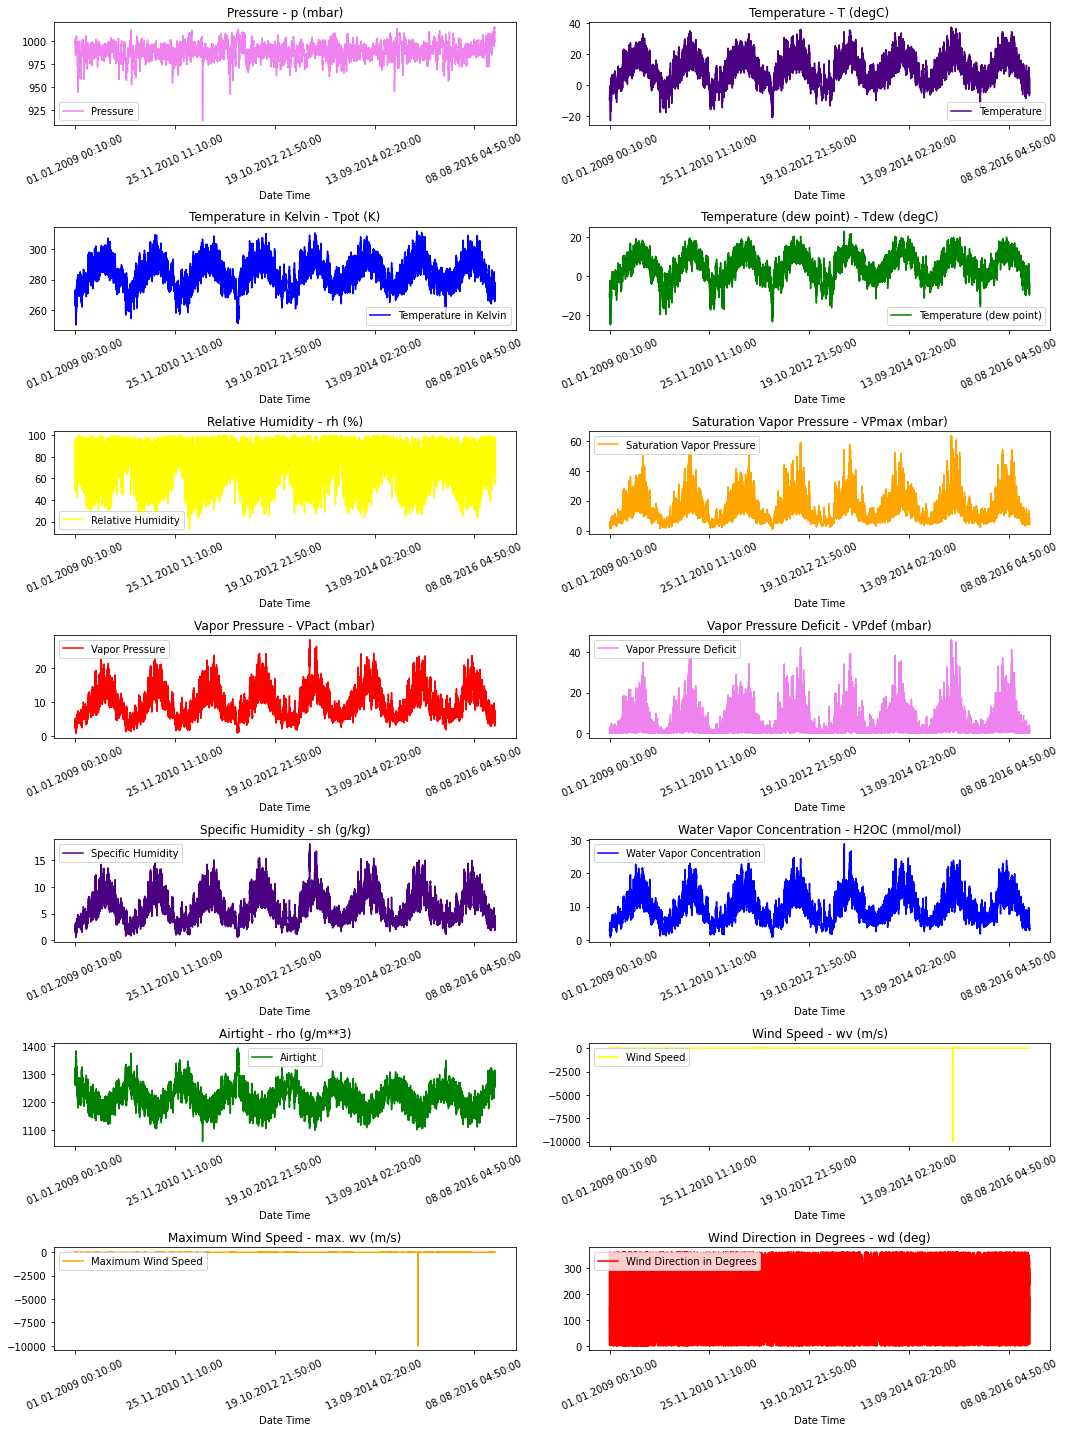

In [13]:
visualize_climate_data(df)

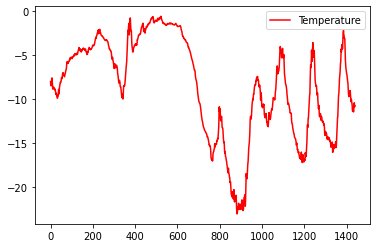

In [14]:
plt.plot(range(1440), df["T (degC)"][:1440], label="Temperature", color = "red")
plt.legend()
plt.show()

In [44]:
def show_corelation(df):

  plt.matshow(df.corr())
  plt.xticks(range(df.shape[1]), df.columns, rotation=90)
  plt.gca().xaxis.tick_bottom()

  plt.yticks(range(df.shape[1]), df.columns)

  plt.colorbar()
  plt.title("Correlation Heatmap")
  plt.show()
  

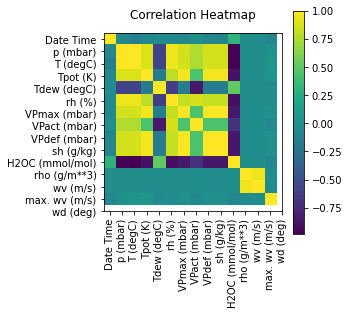

In [45]:
show_corelation(df)

In [15]:
import numpy as np


In [16]:
df[features[0: 14]].head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [17]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [18]:
raw_data = df[features[0: 14]].to_numpy()

In [19]:
raw_data.shape

(420551, 14)

In [20]:
raw_data[:2]

array([[ 9.96520e+02, -8.02000e+00,  2.65400e+02, -8.90000e+00,
         9.33000e+01,  3.33000e+00,  3.11000e+00,  2.20000e-01,
         1.94000e+00,  3.12000e+00,  1.30775e+03,  1.03000e+00,
         1.75000e+00,  1.52300e+02],
       [ 9.96570e+02, -8.41000e+00,  2.65010e+02, -9.28000e+00,
         9.34000e+01,  3.23000e+00,  3.02000e+00,  2.10000e-01,
         1.89000e+00,  3.03000e+00,  1.30980e+03,  7.20000e-01,
         1.50000e+00,  1.36100e+02]])

In [78]:
mean = raw_data[:num_training_data].mean(axis=0)

In [79]:
raw_data -= mean

In [80]:
std = raw_data[:num_training_data].std(axis=0)

In [81]:
raw_data /= std

In [21]:
temperatures = df["T (degC)"].to_numpy()

In [22]:
temperatures[:10]

array([-8.02, -8.41, -8.51, -8.31, -8.27, -8.05, -7.62, -7.62, -7.91,
       -8.43])

In [49]:
num_training_data = int(len(raw_data) * 0.5)
print(num_training_data)

210275


In [51]:
num_validation_data = int(len(raw_data) * 0.25)
print(num_validation_data)

105137


In [54]:
num_test_data = len(raw_data) - num_training_data - num_validation_data
print(num_test_data)

105139


In [55]:
import tensorflow as tf
from tensorflow import keras

In [57]:
int_sequence = np.arange(10)
int_sequence

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [66]:
int_sequence[:-3]

array([0, 1, 2, 3, 4, 5, 6])

In [67]:
int_sequence[3:]

array([3, 4, 5, 6, 7, 8, 9])

In [75]:
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data = int_sequence[:-3],
    targets = int_sequence[3:],
    sequence_length = 3,
    batch_size = 2
)

In [77]:
for inputs, targets in dummy_dataset:
  for i in range(inputs.shape[0]):
    print([int(x) for x in inputs[i]], int(targets[i]))

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


In [82]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 -1)
batch_size = 256

In [83]:
delay

858

In [84]:
training_data = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperatures[delay:],
    sampling_rate=sampling_rate,
    sequence_length = sequence_length,
    shuffle=True,
    batch_size = batch_size,
    start_index = 0,
    end_index=num_training_data
)

In [85]:
validation_data = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperatures[delay:],
    sampling_rate=sampling_rate,
    sequence_length = sequence_length,
    shuffle=True,
    batch_size = batch_size,
    start_index = num_training_data,
    end_index=num_training_data + num_validation_data
)

In [86]:
test_data = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperatures[delay:],
    sampling_rate=sampling_rate,
    sequence_length = sequence_length,
    shuffle=True,
    batch_size = batch_size,
    start_index = num_training_data + num_validation_data
)